<a href="https://colab.research.google.com/github/jorgemunozl/vla-test/blob/main/subtask/subtask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sub Task Test

Check if a model creates coherent words.

In [5]:
# model_id = "NONHUMAN-RESEARCH/pi05_ki_training_fruits"
model_id = "lerobot/pi05_base"
# model_id = "lerobot/pi05_libero"

In [4]:
from huggingface_hub import login
login()

Cloning into 'XHUMAN'...
remote: Enumerating objects: 2163, done.
remote: Counting objects: 100% (369/369), done.
remote: Compressing objects: 100% (239/239), done.
remote: Total 2163 (delta 238), reused 232 (delta 124), pack-reused 1794 (from 2)
Receiving objects: 100% (2163/2163), 7.87 MiB | 5.77 MiB/s, done.
Resolving deltas: 100% (1381/1381), done.


In [2]:
%cd XHUMAN

/content/XHUMAN


We have several problem trying to use the transformers library, this requires a more careful study

In [3]:
!uv pip install -e .[pi]

Using Python 3.12.12 environment at: /usr
Resolved 215 packages in 29.30s
Prepared 46 packages in 21.22s
Uninstalled 15 packages in 986ms
Installed 46 packages in 231ms
 + async-lru==2.1.0
 + av==15.1.0
 + comm==0.2.3
 + deepdiff==8.6.1
 - diffusers==0.36.0
 + diffusers==0.35.2
 + draccus==0.10.0
 + evdev==1.9.2
 + faker==40.1.2
 + feetech-servo-sdk==1.0.0
 - huggingface-hub==0.36.0
 + huggingface-hub==0.35.3
 + inquirerpy==0.3.4
 - ipykernel==6.17.1
 + ipykernel==7.1.0
 + jedi==0.19.2
 + json5==0.13.0
 + jsonlines==4.0.0
 + jupyter==1.1.1
 - jupyter-client==7.4.9
 + jupyter-client==8.8.0
 + jupyter-lsp==2.3.0
 + jupyterlab==4.5.2
 + jupyterlab-server==2.28.0
 + lerobot==0.4.3 (from git+https://github.com/huggingface/lerobot.git@9919b16b3693a756388dd2cccdd04396308fd0ae)
 + mergedeep==1.3.4
 + mypy-extensions==1.1.0
 - notebook==6.5.7
 + notebook==7.5.2
 - nvidia-cudnn-cu12==9.10.2.21
 + nvidia-cudnn-cu12==9.5.1.17
 - nvidia-cusparselt-cu12==0.7.1
 + nvidia-cusparselt-cu12==0.6.3
 - nvi

# Take the N frame from a dataset

In [6]:
import torch
from lerobot.datasets.lerobot_dataset import LeRobotDataset

DS_ID = "NONHUMAN-RESEARCH/TEST_RECORD_ANNOTATIONS"
dataset = LeRobotDataset(DS_ID)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

stats.json: 0.00B [00:00, ?B/s]

meta/tasks.parquet:   0%|          | 0.00/2.15k [00:00<?, ?B/s]

meta/episodes/chunk-000/file-001.parquet:   0%|          | 0.00/65.3k [00:00<?, ?B/s]

info.json: 0.00B [00:00, ?B/s]

meta/episodes/chunk-000/file-000.parquet:   0%|          | 0.00/65.3k [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

.gitattributes: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

data/chunk-000/file-000.parquet:   0%|          | 0.00/357k [00:00<?, ?B/s]

videos/observation.images.left/chunk-000(…):   0%|          | 0.00/8.51M [00:00<?, ?B/s]

videos/observation.images.left/chunk-000(…):   0%|          | 0.00/8.71M [00:00<?, ?B/s]

videos/observation.images.right/chunk-00(…):   0%|          | 0.00/5.53M [00:00<?, ?B/s]

videos/observation.images.right/chunk-00(…):   0%|          | 0.00/5.92M [00:00<?, ?B/s]

data/chunk-000/file-001.parquet:   0%|          | 0.00/315k [00:00<?, ?B/s]

videos/observation.images.top/chunk-000/(…):   0%|          | 0.00/14.9M [00:00<?, ?B/s]

videos/observation.images.top/chunk-000/(…):   0%|          | 0.00/13.3M [00:00<?, ?B/s]

In [76]:
from xhuman.policies.pi05ki.configuration_pi05ki import PI05KIConfig

policy_config = PI05KIConfig(repo_id="none",device="cuda",pretrained_path=model_id)

In [77]:
from xhuman.policies.factory import make_policy_config

policy = make_policy_config(policy_config)

ValueError: Policy type 'PI05KIConfig(n_obs_steps=1, input_features={}, output_features={}, device='cuda', use_amp=False, use_peft=False, push_to_hub=True, repo_id='none', private=None, tags=None, license=None, pretrained_path='lerobot/pi05_base', alpha=10.0, max_decoding_steps=100, temperature=0.1, eos_token_id=1, paligemma_variant='gemma_2b', action_expert_variant='gemma_300m', dtype='float32', chunk_size=50, n_action_steps=50, max_state_dim=32, max_action_dim=32, num_inference_steps=10, time_sampling_beta_alpha=1.5, time_sampling_beta_beta=1.0, time_sampling_scale=0.999, time_sampling_offset=0.001, min_period=0.004, max_period=4.0, rtc_config=None, image_resolution=(224, 224), empty_cameras=0, tokenizer_max_length=200, subtask_prediction_frequency=100, normalization_mapping={'VISUAL': <NormalizationMode.IDENTITY: 'IDENTITY'>, 'STATE': <NormalizationMode.QUANTILES: 'QUANTILES'>, 'ACTION': <NormalizationMode.QUANTILES: 'QUANTILES'>}, gradient_checkpointing=False, compile_model=False, compile_mode='max-autotune', optimizer_lr=2.5e-05, optimizer_betas=(0.9, 0.95), optimizer_eps=1e-08, optimizer_weight_decay=0.01, optimizer_grad_clip_norm=1.0, scheduler_warmup_steps=1000, scheduler_decay_steps=30000, scheduler_decay_lr=2.5e-06)' is not available.

In [13]:
# for base
# from lerobot.policies.pi05.processor_pi05 import make_pi05_pre_post_processors

pre, _ = make_pi05_pre_post_processors(
    config=policy.config,
    dataset_stats=dataset.meta.stats
)

tokenizer_config.json:   0%|          | 0.00/40.0k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.26M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

**Single batch**

In [60]:
N = 0
batch = dataset[N]
batch.keys()

dict_keys(['observation.images.left', 'observation.images.top', 'observation.images.right', 'action', 'observation.state', 'timestamp', 'frame_index', 'episode_index', 'index', 'task_index', 'task'])

In [61]:
batch["task"]

'Pick up the banana'

The format of the prompt is very important guys

In [62]:
prompt = "Put the fruits in the basket\nSubtask: "

In [63]:

def change_task(batch):
    batch["task"] = prompt
    return batch

batch = change_task(batch)

In [73]:
batch["task"]

['Task: Put the fruits in the basket Subtask:, State: -1 0 255 114 77 112 -1 164 -1 255 175 53 20 2 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128;\nAction: ']

In [65]:
device = "cuda"
#policy.model.eval()
#policy.model.to(device)

In [18]:
batch.keys()

dict_keys(['observation.images.left', 'observation.images.top', 'observation.images.right', 'action', 'observation.state', 'timestamp', 'frame_index', 'episode_index', 'index', 'task_index', 'task'])

In [49]:
del batch["observation.images.left"]
del batch["observation.images.right"]

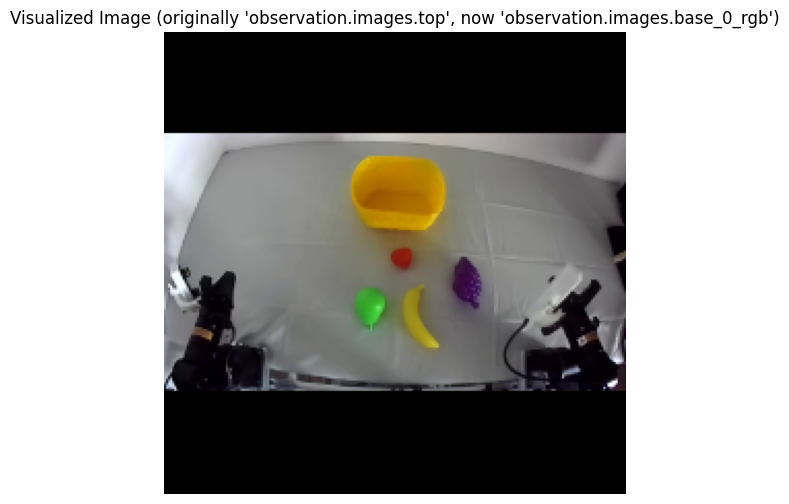

Image tensor shape: torch.Size([3, 224, 224])
Image numpy shape: (224, 224, 3)
Image display min value: 0.0, max value: 1.0


In [66]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# The original 'observation.images.top' is now 'observation.images.base_0_rgb' after key renaming and preprocessing.
# 'processed_images[0]' contains the preprocessed tensor for this image.

# Get the image tensor (assuming processed_images[0] is the 'top' camera image)
image_tensor = processed_images[0].squeeze(0) # Remove batch dimension (1, 3, H, W) -> (3, H, W)

# Move to CPU and convert to NumPy
image_np = image_tensor.cpu().numpy()

# Transpose from (C, H, W) to (H, W, C) for matplotlib
image_np = np.transpose(image_np, (1, 2, 0))

# Unnormalize the image.
# Based on the kernel state, the values in processed_images[0] are around -3.
# A common normalization range for some models is [-3, 3].
# To map from [-3, 3] to [0, 1]: (x + 3) / 6
image_display = (image_np + 1.0) / 2

# Ensure values are strictly within [0, 1] for proper display
image_display = np.clip(image_display, 0, 1)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(image_display)
plt.title("Visualized Image (originally 'observation.images.top', now 'observation.images.base_0_rgb')")
plt.axis('off')
plt.show()

# Print some info about the displayed image
print(f"Image tensor shape: {image_tensor.shape}")
print(f"Image numpy shape: {image_np.shape}")
print(f"Image display min value: {image_display.min()}, max value: {image_display.max()}")

In [67]:
batch = pre(batch)

In [68]:
if "observation.images.top" in batch:
    batch["observation.images.base_0_rgb"] = batch.pop("observation.images.top")
if "observation.images.left" in batch:
    batch["observation.images.left_wrist_0_rgb"] = batch.pop("observation.images.left")
if "observation.images.right" in batch:
    batch["observation.images.right_wrist_0_rgb"] = batch.pop("observation.images.right")

In [69]:
from lerobot.utils.constants import OBS_LANGUAGE_TOKENS, OBS_LANGUAGE_ATTENTION_MASK

processed_images, img_masks = policy._preprocess_images(batch)
tokens = batch[f"{OBS_LANGUAGE_TOKENS}"]
masks = batch[f"{OBS_LANGUAGE_ATTENTION_MASK}"]
max_decoding_steps = 100
temperature = 0.1
PALIGEMMA_EOS_TOKEN = 1

In [53]:
batch.keys()

dict_keys(['action', 'next.reward', 'next.done', 'next.truncated', 'info', 'task', 'index', 'task_index', 'episode_index', 'observation.state', 'observation.language.tokens', 'observation.language.attention_mask', 'observation.images.base_0_rgb'])

In [70]:
from lerobot.utils.constants import OBS_LANGUAGE_TOKENS, OBS_LANGUAGE_ATTENTION_MASK

processed_images, img_masks = policy._preprocess_images(batch)
tokens = batch[f"{OBS_LANGUAGE_TOKENS}"]
masks = batch[f"{OBS_LANGUAGE_ATTENTION_MASK}"]
max_decoding_steps = 100
temperature = 0.1
PALIGEMMA_EOS_TOKEN = 1

In [71]:
with torch.no_grad():
    subtask_tokenized = policy.model.sample_subtask(
        images=processed_images, # Use the fixed images
        img_masks=img_masks,
        tokens=tokens,
        masks=masks.bool(),
        max_decoding_steps=max_decoding_steps,
        eos_token_id=PALIGEMMA_EOS_TOKEN,
        temperature=temperature
    )

In [72]:
subtask = policy._detokenize_subtask(subtask_tokenized)
subtask

'⊏ moveḧ'

Results: KI: